# w261 Final Project - Clickthrough Rate Prediction


Team Members - Arjun, Harith, Rishi, Tej  
Summer 2019, Section 5   

## Table of Contents

* __Section 1__ - Question Formulation
* __Section 2__ - Algorithm Explanation
* __Section 3__ - EDA & Challenges
* __Section 4__ - Algorithm Implementation
* __Section 5__ - Course Concepts

# __Section 1__ - Question Formulation

Today, online advertising is a billion dollars industry. In the US alone, more than 100 billion dollars was spent on online advertising in 2018. In the last decade, online advertising has also evolved from a primitive impression campaign, or pay per impression, to pay per click model. In this Pay-per-click policy, an advertiser has to pay for only those ads which have some clicks on them. Therefore it is essential for companies such as Google, Facebook, and many advertisement agencies to improve and optimize their click-through rate (CTR). In this new model, advertisement agencies goal is not only limited to avoid irrelevant and false impressions but also to present the user with the Ad that is believed to have the highest click propensity.

In this project, we're presented with a CTR dataset from Criteo. Criteo is a personalized retargeting company that works with Internet retailers to serve personalized online display advertisements to consumers who have previously visited the advertiser's website. Criteo is sharing week's worth of data, over 45M records of traffic logs, to help develop models predicting ad click-through rate (CTR). The dataset is very large, consisting of 11GB of training and 1.5GBB of test data. Each record consists of 40 features, 13 of which are numerical and 26 are categorical features. The values of these features have been hashed onto 32 bits for anonymization purposes. It is unclear to us what these features correspond to, but we can guess that they're related to the user, publisher and advertiser features.

In this project, the team will present a machine learning framework based on Logistic Regression. Logistic regression is a machine learning classification algorithm that is used to predict the probability of a dependent variable. For Criteo CTR data, this dependent variable is label - a target variable that indicates if an ad was clicked (1) or not (0). Logistic regression works well with a very large dataset, which applies to us; therefore, we believe logistic regression is a perfect match to this problem. We will use Criteo training dataset to build a logistic regression model that can tell us the probability of a user clicking for a given ad. We will also be able to identify the list of features that have the highest impact in influencing the click decision.

Step 0 is to analyze the data in our hands. This includes exploration of possible correlations between features, data cleaning, and preparing the data for machine learning, such as one-hot encoding.

---TODO:

Challenges?

size of the data.
scalability

# __Section 2__ - Algorithm Explanation

Logistic regression initializes a set of constants in the model parameter space. It then uses the errors of the expected values of the outputs using these constants to provide feedback on and update the constants. The cost function provides feedback on the progress of the algorithm with each iteration. One should expect a decrease in the loss function over time.

### Section 2.1 - Evaluation Function

The evaluation function for logistic regression is:


S(z) = $\frac{1} {1 + e^{-z}}$

where z is a linear combination of the features. This results in a curve for the cost function as follows:

<img src='images/logisticcost.png'>

This loss function is convex, so gradient descent can be used to arrive at a minimum loss provided we have a small enough learning rate.  

### Section 2.2 - Loss Function

The loss function for logistic regression is:

Loss = $1/n*(-y^T*log(h)-(1-y)^T*log(1-h))$

Each step of the algorithm decreases the loss and brings the model a little closer to the optimal model based on the training data.

Initial Table:

<table>
<th>Name</th>
<th>Click</th>
<th>Feature1</th>
<th>Feature2</th>
<tr><td>'firstad.png'</td><td>1</td><td>20</td><td>1</td></tr>
<tr><td>'secondad.png'</td><td>1</td><td>10</td><td>5</td></tr>
<tr><td>'firstad.png'</td><td>1</td><td>15</td><td>4</td></tr>
<tr><td>'thirdad.png'</td><td>0</td><td>12</td><td>2</td></tr>
<tr><td>'firstad.png'</td><td>0</td><td>30</td><td>1</td></tr>    
</table>

After Encoding:

<table>
<th>Name</th>
<th>Click</th>
<th>Feature1</th>
<th>Feature2</th>
<tr><td>0.0</td><td>1</td><td>20</td><td>1</td></tr>
<tr><td>1.0</td><td>1</td><td>10</td><td>5</td></tr>
<tr><td>0.0</td><td>1</td><td>15</td><td>4</td></tr>
<tr><td>3.0</td><td>0</td><td>12</td><td>2</td></tr>
<tr><td>0.0</td><td>0</td><td>30</td><td>1</td></tr>    
</table>

After Standard Scaler

<table>
<th>Name</th>
<th>Click</th>
<th>Feature1</th>
<th>Feature2</th>
<tr><td>0.0</td><td>1</td><td>2/3</td><td>1/5</td></tr>
<tr><td>0.33</td><td>1</td><td>1/3</td><td>1</td></tr>
<tr><td>0.0</td><td>1</td><td>1/2</td><td>4/5</td></tr>
<tr><td>1.0</td><td>0</td><td>4/10</td><td>2/5</td></tr>
<tr><td>0.0</td><td>0</td><td>1</td><td>1/5</td></tr>    
</table>


### Section 2.3 - Algorithm Demonstration


#### Iteration 1:

Coefficient Matrix:

<table>
<th>Feature</th>
<th>Value</th>
<tr><td>1</td><td>1</td>
<tr><td>2</td><td>1</td>
</table>

Expected Output:


<table>
<th>Name</th>
<th>Click</th>
<th>Feature1</th>
<th>Feature2</th>
<th>Expected Output</th>
<tr><td>0.0</td><td>1</td><td>2/3</td><td>1/5</td><td>0.7040516276171624
</td></tr>
<tr><td>0.33</td><td>1</td><td>1/3</td><td>1</td><td>0.791391472673955</td></tr>
<tr><td>0.0</td><td>1</td><td>1/2</td><td>4/5</td><td>0.7858130361180986</td></tr>
<tr><td>1.0</td><td>0</td><td>4/10</td><td>2/5</td><td>0.6899744811276125</td></tr>
<tr><td>0.0</td><td>0</td><td>1</td><td>1/5</td><td>0.7685247834990175</td></tr>    
</table>

Cost:

Cost = $1/5*(-log(0.7040516276171624)-log(0.791391472673955)-log(0.7858130361180986)-log(1-0.6899744811276125)-log(1-0.7685247834990175))=0.7513815715024391$


Update:

alpha=0.25

c_feature1=1+1/5*0.25*((1-0.704)*(0.704)*(1-0.704)*2/3+(1-0.791)*(0.791)*(1-0.791)*1/3+(1-0.786)*(0.786)*(1-0.786)*1/2+(0-0.769)*(0.769)*(1-0.769)*4/10+(0-0.769)*(0.769)*(1-0.769)*1)=0.9997587800272
<br>
c_feature2=1+1/5*0.25*((1-0.704)*(0.704)*(1-0.704)*1/5+(1-0.791)*(0.791)*(1-0.791)*1+(1-0.786)*(0.786)*(1-0.786)*4/5+(0-0.769)*(0.769)*(1-0.769)*2/5+(0-0.769)*(0.769)*(1-0.769)*1/5)=0.999987443788


#### Iteration 2:

Coefficient Matrix:

<table>
<th>Feature</th>
<th>Value</th>
<tr><td>1</td><td>0.99976</td>
<tr><td>2</td><td>0.999987</td>
</table>

Expected Output:

<table>
<th>Name</th>
<th>Click</th>
<th>Feature1</th>
<th>Feature2</th>
<th>Expected Output</th>
<tr><td>0.0</td><td>1</td><td>2/3</td><td>1/5</td><td>0.7040177466801593</td></tr>
<tr><td>0.33</td><td>1</td><td>1/3</td><td>1</td><td>0.7913761187939874</td></tr>
<tr><td>0.0</td><td>1</td><td>1/2</td><td>4/5</td><td>0.7858349830425586</td></tr>
<tr><td>1.0</td><td>0</td><td>4/10</td><td>2/5</td><td>0.6899528330501498</td></tr>
<tr><td>0.0</td><td>0</td><td>1</td><td>1/5</td><td>0.7684816234963084</td></tr>    
</table>

Cost:

Cost = $1/5*(-log(0.7040516276171624)-log(0.791391472673955)-log(0.7858130361180986)-log(1-0.6899744811276125)-log(1-0.7685247834990175))=0.6920571263149928$


#### LogisticRegression

#### RandomForest

#### GradientBoosting

#### LinearSVC

# __Section 3__ - EDA & Challenges

### Section 3.1 - Libraries and Util Functions

#### Section 3.1.1 - Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import time
from IPython.display import Image

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import when  
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.sql.functions import lit
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import monotonically_increasing_id

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

#### Section 3.1.2 - Create Spark Context

In [5]:
# start Spark Session
sc_conf = SparkConf()
sc_conf.setAppName("w261_final_project")

spark = SparkSession\
        .builder\
        .config(conf=sc_conf)\
        .getOrCreate()
    
sc = spark.sparkContext

#### Section 3.1.3 - Util Functions

In [ ]:
#Fill missing values - numerical
def fill_missing_val(t_data):    
    return t_data.na.fill(0)

#Get numeric and categorical columns
def get_columns():
    num_cols = []
    cat_cols = []
    
    #Numerical columns range from column index 2-13
    for c in range(2, 14):
        num_cols.append("_" + str(c))
    
    #Categorical columns range from column index 14-40
    for c in range(14, 41):
        cat_cols.append("_" + str(c))
    
    return num_cols, cat_cols

### Section 3.1 - Load and Visualize Data

#### Section 3.1.1 - Inspect Raw Data

In [10]:
df = spark.read.csv('data/dac/train.small.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- _1: integer (nullable = true)
 |-- _2: integer (nullable = true)
 |-- _3: integer (nullable = true)
 |-- _4: integer (nullable = true)
 |-- _5: integer (nullable = true)
 |-- _6: integer (nullable = true)
 |-- _7: integer (nullable = true)
 |-- _8: integer (nullable = true)
 |-- _9: integer (nullable = true)
 |-- _10: integer (nullable = true)
 |-- _11: integer (nullable = true)
 |-- _12: integer (nullable = true)
 |-- _13: integer (nullable = true)
 |-- _14: integer (nullable = true)
 |-- _15: string (nullable = true)
 |-- _16: string (nullable = true)
 |-- _17: string (nullable = true)
 |-- _18: string (nullable = true)
 |-- _19: string (nullable = true)
 |-- _20: string (nullable = true)
 |-- _21: string (nullable = true)
 |-- _22: string (nullable = true)
 |-- _23: string (nullable = true)
 |-- _24: string (nullable = true)
 |-- _25: string (nullable = true)
 |-- _26: string (nullable = true)
 |-- _27: string (nullable = true)
 |-- _28: string (nullable = true)
 |-- _29: 

In [11]:
#Store the original columns
cols = df.columns

In [12]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
_1,0,0,1,0,0
_2,0,0,NaN,NaN,4
_3,0,8,1,-1,64
_4,2,NaN,3,NaN,4
_5,9,NaN,20,NaN,2
_6,1366,4910,17647,311637,1490
_7,316,NaN,30,NaN,50
_8,24,NaN,1,0,6
_9,47,8,1,0,12
_10,350,NaN,30,1,27


From the plot above, it is evident that there are three broad classifications of columns  
- Column 1 : Output/Label
- Column 2-14 : Numerical Values
- Column 15 - 40: Categorical Values

Moreover, there are plenty of missing values and that could be filled up a standard constant value - 0

In [20]:
df = df.na.fill(0)

pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
_1,0,0,1,0,0
_2,0,0,0,0,4
_3,0,8,1,-1,64
_4,2,0,3,0,4
_5,9,0,20,0,2
_6,1366,4910,17647,311637,1490
_7,316,0,30,0,50
_8,24,0,1,0,6
_9,47,8,1,0,12
_10,350,0,30,1,27


Getting numeric and categorical column names.

In [ ]:
numericCols = df.columns[1:14]
categoricalColumns = df.columns[14:41]

#### Section 3.1.2 - Inspect Data Distribution of Numerical Columns

In [17]:
#Data distribution 
df.describe().select('Summary', '_2', '_3', '_4', '_5', '_6').show()

+-------+------------------+----------------+-----------------+-----------------+-----------------+
|Summary|                _2|              _3|               _4|               _5|               _6|
+-------+------------------+----------------+-----------------+-----------------+-----------------+
|  count|              2764|            5000|             4014|             4012|             4859|
|   mean|3.0861070911722144|        111.8884|20.57498754359741|7.587487537387837|19752.57089936201|
| stddev| 7.437360728411959|398.904083256824|58.24237003906267|8.949486932145078|74237.14669289338|
|    min|                 0|              -2|                0|                0|                0|
|    max|               151|            5945|             2050|               91|          1577121|
+-------+------------------+----------------+-----------------+-----------------+-----------------+



In [18]:
df.describe().select('Summary', '_7', '_8', '_9', '_10', '_11').show()

+-------+------------------+------------------+------------------+------------------+------------------+
|Summary|                _7|                _8|                _9|               _10|               _11|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              3800|              4778|              4999|              4778|              2764|
|   mean|124.05131578947369|15.510464629552114|12.320464092818563|103.23231477605692| 0.532561505065123|
| stddev| 347.0117403373191|48.293716133203866|13.536432961145458|210.93376545285946|0.6234846166130683|
|    min|                 0|                 0|                 0|                 0|                 0|
|    max|              5936|              1036|               237|              4144|                 5|
+-------+------------------+------------------+------------------+------------------+------------------+



In [19]:
df.describe().select('Summary', '_12', '_13', '_14').show()

+-------+-----------------+------------------+------------------+
|Summary|              _12|               _13|               _14|
+-------+-----------------+------------------+------------------+
|  count|             4778|              1152|              4012|
|   mean|2.620971117622436|0.8732638888888888| 8.593469591226322|
| stddev|5.097635360270372|3.5293847192911856|11.277355438010085|
|    min|                0|                 0|                 0|
|    max|               81|                43|               182|
+-------+-----------------+------------------+------------------+



The numeric columns seem to have different ranges and scales. These columns need to be rescaled.

The following plot shows the class distribution of the output variable.

In [58]:
Labels_counts=df.select("_1").groupBy("_1").count().toPandas()
fig_std=(10,8)
width = 0.4
Labels_counts.plot(kind='bar', figsize=fig_std).set(xlabel='Label value', ylabel='frequency',title='Labels')

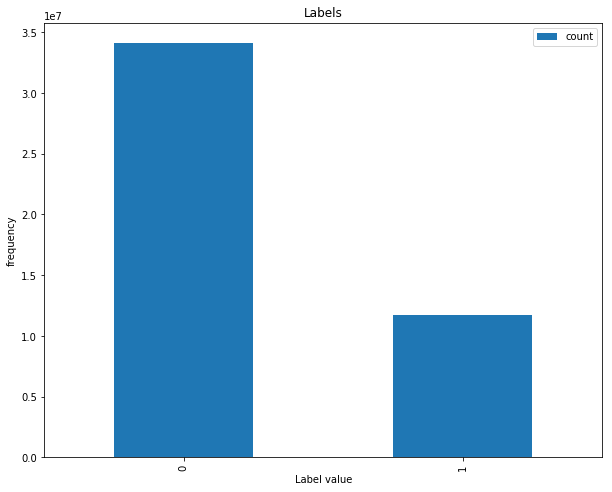

In [4]:
Image("images/Label0_1_histogram.png") 

There is an imbalance of the count of 0 and 1, around 75% of lables are 0 and 25% 1. It should be rebalanced for the better performance of the algorithms.

In [ ]:
## Histogram of numerical columns (_2 to _8)
data=df.sample(False, 0.1, seed=0).limit(10000000).select(['_2','_3','_4','_5','_6','_7','_8']).toPandas()
data.loc[:, '_2': '_8'].hist(bins=50, figsize=(20,15), color = 'green')

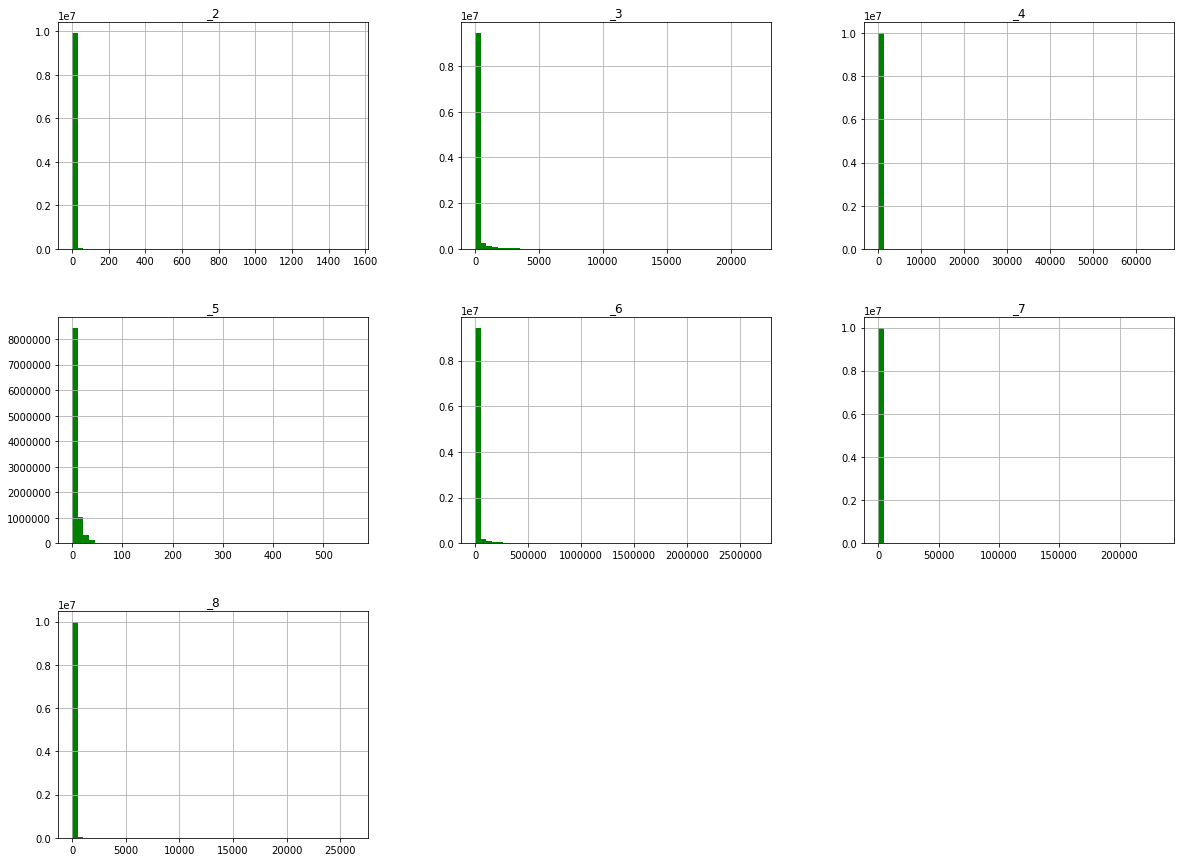

In [5]:
Image("images/Histo_2_8.png") 

In [ ]:
## Histogram of numerical columns (_2 to _14)
data=df.sample(False, 0.1, seed=0).limit(10000000).select(['_9','_10','_11','_12','_13','_14']).toPandas()
data.loc[:, '_9': '_14'].hist(bins=50, figsize=(20,15), color = 'green')

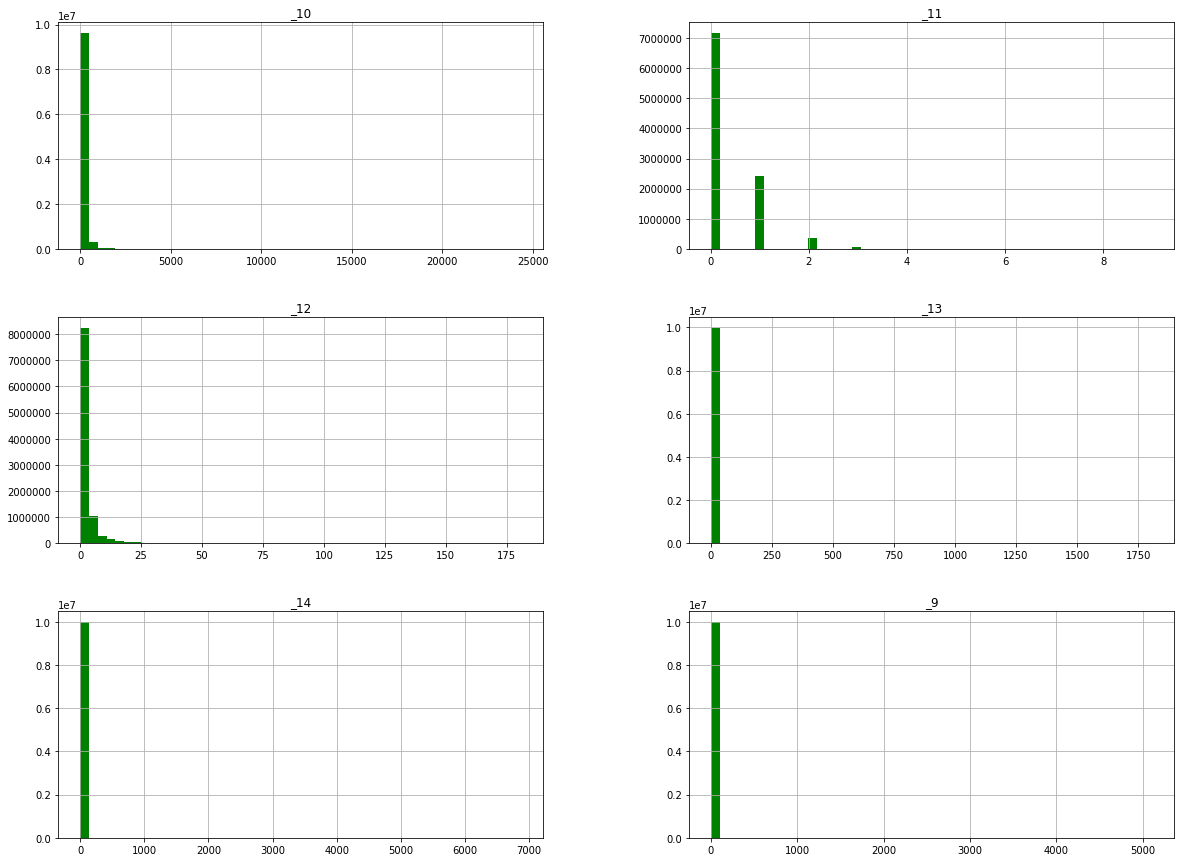

In [8]:
Image("images/histo_9_14.png")

All the numerical columns are on different scales. All the columns will be rescaled. It is also evident that most of the values are over shorter range.

In [ ]:
numeric_data = df.sample(False,0.1,seed=0).limit(1000000).select(numericCols).toPandas()

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(18, 18));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

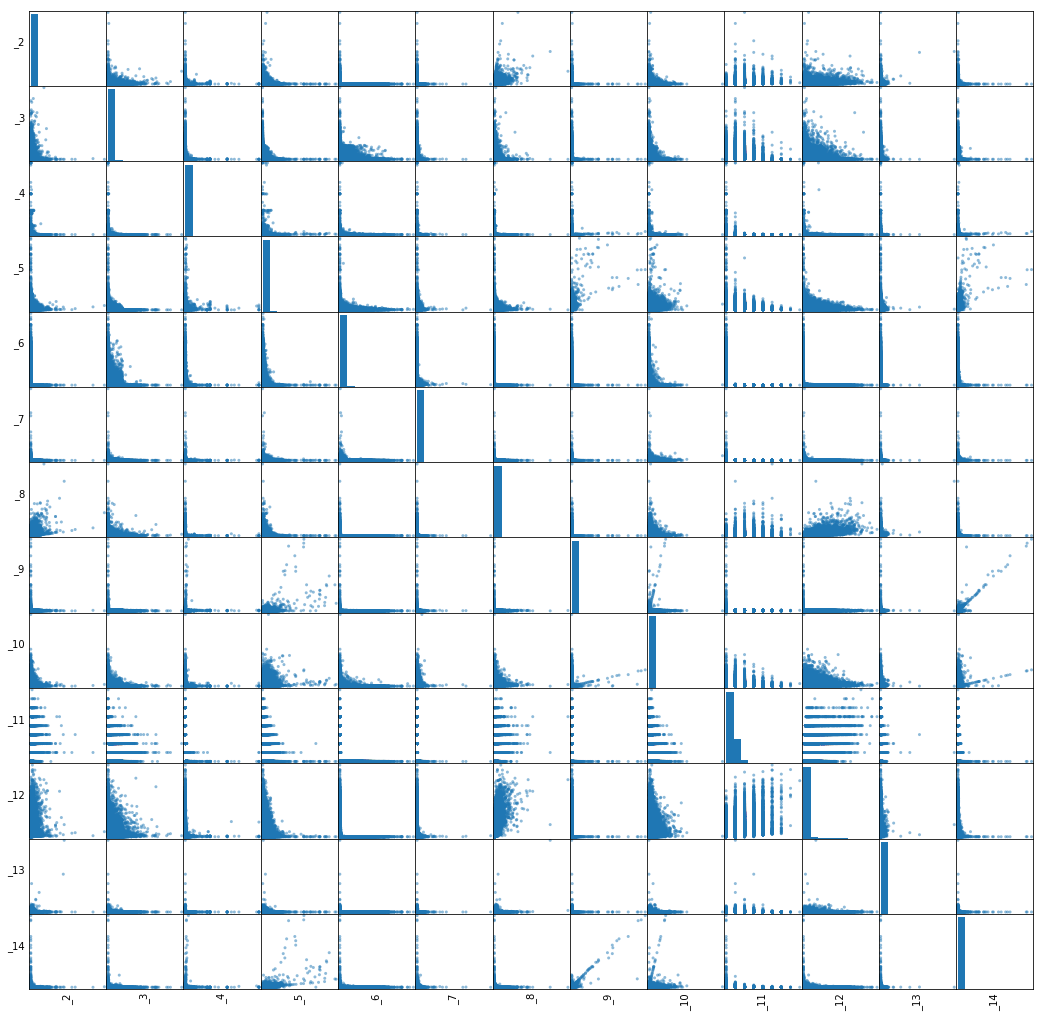

In [9]:
Image("images/Scat-_2_14.png")

Scatter plots above show that there is no perfect collinearity between any 2 columns so all the columns will be included in analysis.

### Section 3.2 - Run Algorithm on Randomly Sampled Data Source

#### Section 3.2.1 - Pre-process Data

#### Section 3.2.1.1 - StringIndexer and VectorAssembler Pipeline

In the section below a pipeline has been used to encode categorical columns and generate vector of all column values for the machine learning algorithms. 

In [22]:
stages = []
indexerCols = []

for categoricalCol in categoricalColumns:
    indexerCol = categoricalCol + "Index"
    
    #Run StringIndexer to generate numerical frequency values for categorical columns.
    indexer = StringIndexer(inputCol=categoricalCol, outputCol= indexerCol).setHandleInvalid("keep")
    stages += [indexer]
    
    #Add invidual columns to the pipeline
    indexerCols.append(indexerCol)

label_stringIdx = StringIndexer(inputCol = '_1', outputCol = 'output')
stages += [label_stringIdx]

Add VectorAssembler to the pipeline to generate vector of column values.

In [23]:
assembler = VectorAssembler(inputCols=indexerCols + numericCols, outputCol="features")
stages += [assembler]

Execute pipeline and show the vector and output column

In [24]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

selectedCols = ['output', 'features'] + cols
df = df.select(selectedCols)

pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
output,0,0,1,0,0
features,"[156.0, 220.0, 0.0, 0.0, 31.0, 4.0, 0.0, 1.0, ...","(1316.0, 1446.0, 0.0, 5.0, 462.0, 3.0, 0.0, 77...","[1452.0, 86.0, 0.0, 1.0, 970.0, 0.0, 0.0, 18.0...","[598.0, 2133.0, 0.0, 1.0, 174.0, 1.0, 1.0, 560...","[58.0, 69.0, 0.0, 1.0, 313.0, 2.0, 0.0, 1176.0..."
_1,0,0,1,0,0
_2,0,0,0,0,4
_3,0,8,1,-1,64
_4,2,0,3,0,4
_5,9,0,20,0,2
_6,1366,4910,17647,311637,1490
_7,316,0,30,0,50
_8,24,0,1,0,6


#### Section 3.2.1.2 - Re-scaling Data

As stated during EDA, all the column values should be on a uniform scale.

In [25]:
standardscaler=StandardScaler().setInputCol("features").setOutputCol("scaled_features")
df=standardscaler.fit(df).transform(df)
df.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[156.0,220.0,0.0,...|[0.14742378229343...|
|(37,[0,1,3,4,5,7,...|(37,[0,1,3,4,5,7,...|
|[1452.0,86.0,0.0,...|[1.37217520442350...|
|[598.0,2133.0,0.0...|[0.56512449879149...|
|[58.0,69.0,0.0,1....|[0.05481140623730...|
+--------------------+--------------------+
only showing top 5 rows



#### Section 3.2.1.2 - Test/Train Split

Randomly spliting of train and test.

In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2019)

#### Section 3.2.1.3 - Output Class Imbalance Check

From the EDA, it was clear that the number of records with Label/Class 1 is much than the Label/Class 0. To balance the weight ratio with the Class count, the loss function in the LogisticRegression algorithm should put a higher weight on the Label/Class 1.

In [ ]:
dataset_size=float(train.select("output").count())
numPositives=train.select("output").where('output == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)

In [28]:
#Calculate balance ratio

BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.7419447640966629


In [29]:
train=train.withColumn("classWeights", when(train.output == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.2580552359033371|
|0.2580552359033371|
|0.2580552359033371|
|0.2580552359033371|
|0.2580552359033371|
+------------------+
only showing top 5 rows



#### Section 3.2.1.4 - Feature Selection

Initially, to narrow down to a number of significant features, the ChiSqSelector had been used. However, without any feature selection, the algorithm performance became better. So, it is not during actual data processing. 

In [30]:
css = ChiSqSelector(featuresCol='scaled_features',outputCol='Aspect',labelCol='output',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

#### Section 3.2.2 - Train and Test with ML Algorithms

This is a binary classification problem and spark mllib classifiers have been chosen for the training.

#### Logistic Regression

In [ ]:
lr = LogisticRegression(maxIter=10, featuresCol="scaled_features", labelCol="output", 
                        weightCol="classWeights", predictionCol="prediction")

# Fit the model
lrModel = lr.fit(train)

predict_train=lrModel.transform(train)
predict_test=lrModel.transform(test)

Evaluate the model

In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

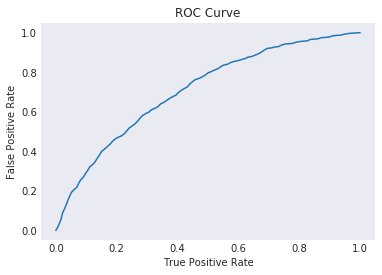

In [6]:
Image("images/lr-fp-fn.png")

From the ROC curve above, it is clear the classifier has a good number of Type 1 and Type 2 errors.

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

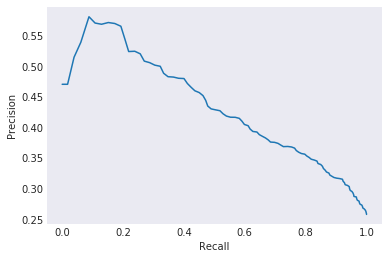

In [7]:
Image("images/lr-prec-recall.png")

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'rawPrediction', labelCol = 'output')

print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set is 0.7089600724140556 <br>
The area under ROC for test set is 0.6908602650546408

The ROC value indicates the model has a roughly 70% chance of identifying TRUE-Positive and TRUE-Negative. With hyper-parameter tuning, we will determine if there is a possibility to improve the performance.

In [ ]:
paramGrid = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,10])\
    .addGrid(lr.elasticNetParam,[0.0, 0.5])\
    .addGrid(lr.maxIter,[10, 100])\
    .addGrid(lr.regParam,[0.0, 0.01, 0.5]) \
    .build()

In [ ]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.7101656765496804 <br>
The area under ROC for test set after CV  is 0.6967054173448046

In [ ]:
print('Best Parameter Combinations - \n')

for key, value in cvModel.bestModel.extractParamMap().items():
    if 'regParam' in str(key):
        print('regParam: ' + str(value))
    elif 'aggregationDepth' in str(key):
        print('aggregationDepth: ' + str(value))
    elif 'elasticNetParam' in str(key):
        print('elasticNetParam: ' + str(value))
    elif 'maxIter' in str(key):
        print('maxIter: ' + str(value))

Even after tuning, the model fails to improve much. Best Parameter Combinations are      

aggregationDepth: 2  
elasticNetParam: 0.5  
maxIter: 100  
regParam: 0.01  

#### RandomForest Classifier

In [ ]:
rf = RandomForestClassifier(numTrees=10, featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = 'output')
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7170483608463148

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

In [ ]:
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.7954825939552024  
The area under ROC for test set after CV  is 0.7308904905835857

In [ ]:
print('Best Parameter Combinations - \n')

for key, value in cvModel.bestModel.extractParamMap().items():
    if 'numTrees' in str(key):
        print('numTrees: ' + str(value))
    elif 'maxDepth' in str(key):
        print('maxDepth: ' + str(value))

Compare to LogisticRegression, the RandomForest model has less the Type 1 and Type 2 errors. For the training set, there is almost 80% chance of classifying positive and negative cases. However, the ROC value for the test data is much less compared to the train data and the model might be leaning towards overfitting. For now, we will analyze further before introducing regularization parameters. Best Parameter Combinations -   

maxDepth: 5  
numTrees: 20  

#### Gradient-Boosted Tree Classifier

In [ ]:
gbt = GBTClassifier(maxIter=10, featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = 'output')
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7142571495001185

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [10, 20]) \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .build()

In [ ]:
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.8872641258635169  
The area under ROC for test set after CV  is 0.7191839107184387

In [ ]:
print('Best Parameter Combinations - \n')

for key, value in cvModel.bestModel.extractParamMap().items():
    if 'maxIter' in str(key):
        print('maxIter: ' + str(value))
    elif 'maxDepth' in str(key):
        print('maxDepth: ' + str(value))

The ROC value for this model is much better than RandomForest and LogisticRegression, but test data performance did not improve. We will continue to do tuning for better performance in unseen data. Best Parameter Combinations -   
maxIter: 20  
maxDepth: 5  

#### LinearSVC

In [ ]:
sv = LinearSVC(maxIter=10, regParam=0.1,
                     featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
svModel = sv.fit(train)
predictions = svModel.transform(test)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = 'output')
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6627900488258549

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(sv.maxIter, [10, 100]) \
    .addGrid(sv.regParam, [0.0, 0.01, 0.5]) \
    .addGrid(sv.aggregationDepth, [2, 5]) \
    .build()

In [ ]:
cv = CrossValidator(estimator=sv, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
# Run cross validations
cvModel = cv.fit(train)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train)
predict_test=cvModel.transform(test)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.68813800514662  
The area under ROC for test set after CV  is 0.6758126017205318

In [ ]:
print('Best Parameter Combinations - \n')

for key, value in cvModel.bestModel.extractParamMap().items():
    if 'maxIter' in str(key):
        print('maxIter: ' + str(value))
    elif 'regParam' in str(key):
        print('regParam: ' + str(value))
    elif 'aggregationDepth' in str(key):
        print('aggregationDepth: ' + str(value))

Although ROC value for this model is low, with a moderate regularization parameter value, the model produces a robust performance with the test data. Best Parameter Combinations -   

maxIter: 100  
regParam: 0.01  
aggregationDepth: 2  

### Section 3.3 - Challenges

#### Section 3.3.1 - EDA and train/test setup

In our EDA, one of our considerations was whether to use the entire dataset or just a subset of data. On the one hand, we could obtain a complete overview of our samples by considering all samples. However, this could lead to longer times for our EDA (a little over 4 times as much time taking into account the increased communication time involved with partitioning more keys). We felt that it would be more prudent to consider 25% of the sample size for our EDA to make our EDA jobs run faster, taking into account that 25% of the sample size is still representative of the entire sample. 

Upon exploring the number, type, and distribution of columns, we saw that we had 14 numeric columns and 26 string columns. We initially explored on-hot encoding the string columns in our EDA. However, the expansion of columns with one-hot encoding was making the size of the data too large and Spark cluster was running out of memory In order to tackle this, we attempted to increase the memory allocated to the executor in spark to 128GB. However, this increase in memory resulted in slower speeds and was still not enough to tackle our memory issues. Finally, we used an alternate solution of encoding string columns as one numeric column with the StringIndexer method in the ml module in Spark. This helped us condense data in each string column into 1 column.

Upon looking at the results of our EDA, we noticed that there are a lot of columns and some columns are fairly skewed even after using the standard scaler function in Spark. We decided to use a Chi-Square Selected provided by the MlLib module in Spark, which selected columns based on independence, to select columns with the most predictive power.   

#### Section 3.3.2 - Model Selection

We considered 4 different classification algorithms in the mllib module of Spark for our algorithms. These were: Logistic Regression, Random Forest, Gradient Boosted Trees, and Linear Support Vector Classification. We did not try a Naive Bayes Classifier as some of the features were highly skewed and this could make training a Naive Bayes classifier problematic. We wanted to test the entire range of classification algorithms to test the best performing model based on the AUC metric of the ROC curve. 

We felt logistic regression was the simplest method to approach the classification problem. As it was simple, it would also be the one that is most efficient. However, logistic regression would not have the same power to address overfitting as some other algorithms such as Naive Bayes or Random Forests would.

For Random Forest and Gradient Boosted Trees(GBT), we recognized that increasing the number of trees in GBT's can lead to an increase in training time and lead to overfitting. At the same time, we wished to keep training times for the Random Forest at a manageable range. This led us to decide on iterations of 10 and number of trees of 10 for GBTs and Random Forests respectively.

For a Linear Support Vector Classifier, we felt it could offer a flexible model which may help counteract the skew in our data, however, we felt it could be lacking in revealing the reasons behind the classifications predicted by the model. 

With these considerations in mind, we went on to test our models on the classification task.

# __Section 4__ - Algorithm Implementation (Cloud Processing with Full Data)

After the exploratory data analysis and hyper-parameter tuning on the sample data, we will run through all the classifiers with the entire data source. In this section, we utilize similar data processing techniques and the best set of model parameters from the cross validator outputs.

### Section 4.1 - File and Data Pre-processing

In [ ]:
BUCKET_BASE_PATH = 'gs://w261FinalProj/projdata/'
DATABRICKS_NS = "com.databricks.spark.csv"

#### Section 4.1.1 - Generate Dataframe from Input Text data

In [ ]:
#Read input data as an RDD
train_tmp_rdd = sc.textFile(BUCKET_BASE_PATH + 'dac/train.txt')

#Format the tab delimited item before converting to dataframe
rdd_train = train_tmp_rdd.map(lambda r : r.split('\t'))

#Convert the RDD to a dataframe
df_train = rdd_train.toDF()

#Saves 
df_train.write.format(DATABRICKS_NS).option("header", "true").save(BUCKET_BASE_PATH + "dac/train.csv")

#### Section 4.1.2 - Split Input Dataframe by Columns

In [ ]:
#Read csv as a dataframe
df_train = spark.read.csv(BUCKET_BASE_PATH + 'dac/train.csv', header = True, inferSchema = True)

#Get all the columns of the dataframe
cols = df_train.columns

#Iterate columns and generate dataframes for each
for col in cols:
    df_with_one_col = df_train.select(col)
    df_with_one_col.write.format(DATABRICKS_NS).option("header", "true").save(BUCKET_BASE_PATH + "split_df/train" + col + ".csv")

#### Section 4.1.3 - Generate StringIndexer for each Categorical Column

In [ ]:
#Convert categorical string values to ordered numeric frequencies
def get_cat_col_indexed(t_data, index_col):
    #Keep the unseen label and create a new frequency index
    indexer = StringIndexer(inputCol=t_data.columns[0], outputCol= index_col).setHandleInvalid("keep")
    
    t_data = indexer.fit(t_data).transform(t_data)
    
    #Return a dataframe with only indexed column
    t_data = t_data.select(index_col)
    
    return t_data


def pre_process_each_split_df(t_data, index_col):    
    #Fill missing values
    t_data = fill_missing_val(t_data)
    
    return get_cat_col_indexed(t_data, index_col)

#Convert each categorical string values to numerical frequencies with StringIndexer
def indexed_all_dfs(cols):
    #Read each dataframe by categorical columns and save each of them after processing
    for c in cols:
        df_train = spark.read.csv(BUCKET_BASE_PATH + "split_df/train" + c + ".csv", header = True, inferSchema = True)
        index_col = df_train.columns[0] + "Index"
        df_train = pre_process_each_split_df(df_train, index_col)
        df_train.write.format(DATABRICKS_NS).option("header", "true").save(BUCKET_BASE_PATH + "split_df_indx/train_p_" + c + ".csv")
        
    #Process the output column
    df_train = spark.read.csv(BUCKET_BASE_PATH + "split_df/train_1.csv", header = True, inferSchema = True)
    df_train = get_cat_col_indexed(df_train, "output")
    df_train.write.format(DATABRICKS_NS).option("header", "true").save(BUCKET_BASE_PATH + "split_df_indx/train_p_output.csv")

In [ ]:
#Get columns and stages
num_cols, cat_cols = get_columns()

indexed_all_dfs(cat_cols)

#### Section 4.1.4 - Generate Vector Assembler Column

In [ ]:
def print_to_output_file(p_txt):
    print(p_txt)

#Get all the numerical and categorical columns and create a vector for the ML algos
def get_vect_assem(t_data, cols):    
    assembler = VectorAssembler(inputCols=cols, outputCol="features")

    return assembler.transform(t_data)

#Read each indexed (categorical) / numeric columns and generate a vector column
def assemble_all_dfs():    
    num_cols, cat_cols = get_columns()
    cat_indexed_col = []
    
    #Read and join each dataframes with auto-generated id columns
    df_train = spark.read.csv(BUCKET_BASE_PATH + "split_df_indx/train_p_output.csv", header = True, inferSchema = True)
    df_train = df_train.withColumn("id", monotonically_increasing_id())
    
    for nc in num_cols:
        df1 = spark.read.csv(BUCKET_BASE_PATH + "split_df/train" + nc + ".csv", header = True, inferSchema = True)
        df1 = df1.withColumn("id", monotonically_increasing_id())
        df_train = df_train.join(df1, "id", "outer")
        
    for c in cat_cols:
        df1 = spark.read.csv(BUCKET_BASE_PATH + "split_df_indx/train_p_" + c + ".csv", header = True, inferSchema = True)
        df1 = df1.withColumn("id", monotonically_increasing_id())
        df_train = df_train.join(df1, "id", "outer")
        cat_indexed_col.append(df1.columns[0])
    
    #After joining all the dataframes, remove the id column 
    df_train = df_train.drop('id')
    
    all_c = num_cols + cat_indexed_col
        
    df_train = fill_missing_val(df_train)
    
    df_train = get_vect_assem(df_train, all_c).select(['features', 'output'])
        
    return df_train  


In [ ]:
t0 = time.time()

df_tn = assemble_all_dfs()
t1 = time.time()
print_to_output_file('Runtime - assemble all - ' + str(float(t1 - t0)))

Runtime - assemble all - 297.4144537448883

#### Section - 4.1.5 - Standardize Scales for all the Values

In [ ]:
def run_standard_scaler(t_data):
    standardscaler=StandardScaler().setInputCol("features").setOutputCol("scaled_features")
    t_data = standardscaler.fit(t_data).transform(t_data)
    
    return t_data

In [ ]:
t0 = time.time()

df_tn = run_standard_scaler(df_tn)

t1 = time.time()
print_to_output_file('Runtime - standard scaler - ' + str(float(t1 - t0)))

Runtime - standard scaler - 1022.7532405853271

#### Section - 4.1.6 - Test-Train split

In [ ]:
def train_test_split(t_data):
    train, test = t_data.randomSplit([0.7, 0.3], seed = 2019)
    print("Training Dataset Count: " + str(train.count()))
    print("Test Dataset Count: " + str(test.count()))
    
    return train, test

In [ ]:
t0 = time.time()

train, test = train_test_split(df_tn)

t1 = time.time()
print_to_output_file('Runtime - test train split - ' + str(float(t1 - t0)))

Training Dataset Count: 32195163 <br>
Test Dataset Count: 13799653 <br>
Runtime - test train split - 2079.2427320480347

#### Section - 4.1.7 - Balance Train Data Weight Ratio

In [ ]:
def get_balance_weight_ratio_data(t_data):
    dataset_size=float(t_data.select("output").count())
    numPositives=t_data.select("output").where('output == 1').count()
    per_ones=(float(numPositives)/float(dataset_size))*100
    numNegatives=float(dataset_size-numPositives)
    
    #Rebalance data
    BalancingRatio = numNegatives/dataset_size
    
    return t_data.withColumn("classWeights", when(t_data.output == 1,BalancingRatio).otherwise(1-BalancingRatio))

In [ ]:
t0 = time.time()

train = get_balance_weight_ratio_data(train)

t1 = time.time()
print_to_output_file('Runtime - get balanced train data - ' + str(float(t1 - t0)))

Runtime - get balanced train data - 2556.4728071689606

### Section - 4.2 - Run Classification Algorithms

#### Section - 4.2.1 - Print Performance

In [ ]:
def print_perf_summary(trainingSummary):
    print_to_output_file('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))
    
    accuracy = trainingSummary.accuracy
    falsePositiveRate = trainingSummary.weightedFalsePositiveRate
    truePositiveRate = trainingSummary.weightedTruePositiveRate
    fMeasure = trainingSummary.weightedFMeasure()
    precision = trainingSummary.weightedPrecision
    recall = trainingSummary.weightedRecall
    
    trainingOutput = "Accuracy: " + str(accuracy) + "\nFPR: " + str(falsePositiveRate) + "\nTPR: " + str(truePositiveRate) + "\nF-measure: " + str(fMeasure) + "\nPrecision: " + str(precision) + "\nRecall: " + str(recall)
    
    print_to_output_file(trainingOutput)
    
def print_perf_eval(predictions):
    predictions.filter(predictions['prediction'] == 0) \
    .select("probability","output","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)
    
    evaluator = BinaryClassificationEvaluator(labelCol = 'output')
    print_to_output_file("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

#### Section - 4.2.2 - Logistic Regression

In [31]:
lr = LogisticRegression(elasticNetParam=0.5, regParam=0.01, featuresCol="scaled_features", labelCol="output", 
                            weightCol="classWeights", predictionCol="prediction")
    # Fit the model
    lrModel = lr.fit(tn_data)

    predict_train=lrModel.transform(tn_data)
    #predict_test=lrModel.transform(ts_data)
    
    trainingSummary = lrModel.summary
    
    print_perf_summary(trainingSummary)

In [ ]:
t0 = time.time()

run_logistic_regression(train)

t1 = time.time()
print_to_output_file('Runtime - lr - ' + str(float(t1 - t0)))

Performance Data for the entire dataset

- Training set areaUnderROC: 0.5857525280951904
- Test set areadUnderROC: 0.586126037418243


- Accuracy: 0.4651128804659259
- FPR: 0.35903086029442455
- TPR: 0.4651128804659259
- F-measure: 0.48464212442632626
- Precision: 0.6709603205252765
- Recall: 0.4651128804659259


- Runtime - 5921.8369500637054 seconds 

With the entire dataset, for the LogisticRegression model, the error rate is much higher than the sample model which was tested during EDA. 

#### Section - 4.2.2 - RandomForest Classifier

In [ ]:
def run_random_forest_algorithm(tn_data, ts_data):
    rf = RandomForestClassifier(featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
    rfModel = rf.fit(tn_data)
    predictions = rfModel.transform(ts_data)
    
    print_perf_eval(predictions)

In [ ]:
t0 = time.time()

run_random_forest_algorithm(train, test)

t1 = time.time()
print_to_output_file('Runtime - rf' + str(float(t1 - t0)))

This classifier shows poorer performance compare to the EDA model.

- Test Area Under ROC: 0.6205110391100006
- Runtime - 4993.300621509552 seconds

#### Section - 4.2.3 - Gradient-Boosted Tree Classifier

In [ ]:
def run_gradient_boost(tn_data, ts_data):
    gbt = GBTClassifier(featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
    gbtModel = gbt.fit(tn_data)
    predictions = gbtModel.transform(ts_data)
    
    print_perf_eval(predictions)

In [ ]:
t0 = time.time()

run_gradient_boost(train, test)

t1 = time.time()
print_to_output_file('Runtime - gb' + str(float(t1 - t0)))

This classifier performs better than RandomForest and LogisticRegression. However, the chance of correct classification is still low.

- Test Area Under ROC: 0.6529670648604486
- Runtime - 7405.279472589493 seconds

#### Section - 4.2.4 - LinearSVC

In [ ]:
def run_lsvc(tn_data, ts_data):
    sv = LinearSVC(regParam=0.01,featuresCol="scaled_features", labelCol="output", predictionCol="prediction")
    svModel = sv.fit(tn_data)
    predictions = svModel.transform(ts_data)
    
    evaluator = BinaryClassificationEvaluator(labelCol = 'output')
    print_to_output_file("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

In [ ]:
t0 = time.time()

run_lsvc(train, test)

t1 = time.time()
print_to_output_file('Runtime - lsvc - ' + str(float(t1 - t0)))

The LinearSVC classifier turns out to be the poorest performer among all classifiers.

- Test Area Under ROC: 0.5563562601488108  
- Runtime - 4158.405479669571 seconds

#### Section 4.3 - Comparison

Gradient-Boosted Tree performs better than other classifiers. During EDA taking multiple samples and tuning a broad range of hyper-parameters should give better results. 

+------------------------------+------------+------------------+  
|       Classifier             |ROC(test)   |Runtime(seconds)  |  
+------------------------------+------------+------------------+  
|LogisticRegression            |       0.586|              5921|  
|RandomForest                  |       0.620|              4993|  
|Gradient-Boosted Trees        |       0.652|              7405|  
|Leaner Support Vector Machine |       0.556|              4158|  
+------------------------------+------------+------------------+  

#### Section 4.4 - System Configuration and Usage

Google DataProc with 3 node cluster and each machine has 8 cores/30 GB memory.

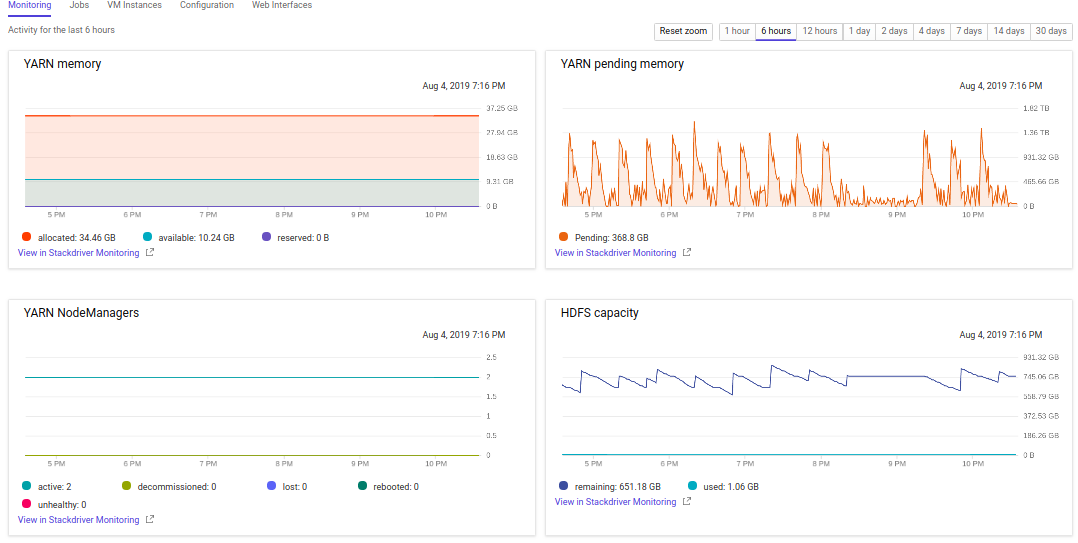

In [4]:
Image("images/cloudresourceusage.png")

# __Section 5__ - Course Concepts

The following are some key course concepts we implemented in our approach:

1. Subsampling-in order to decrease runtimes for our EDA, we used a subsample(25%) of our data, which we thought would still be representative of the entire dataset. This cut down on our EDA run time more than 4 times when taking into account the extra communication required to partition more keys in the entire sample versus the subsample.

2. Dense Representation of Data to minimize memory usage-We condensed the string column data into a 1 column numeric representation rather than a one-hot encoded version which would comprise multiple columns. In doing this, we drew from lessons in the course on condensing data into dense representations in order to convey information making the least use of memory to improve performance. This made the Spark jobs we ran faster, more scalable, and less likely to run out of memory.  

3. Feature selection to improve predicting performance-we used a Chi-Square Feature Selector to ensure that we selected the most independent and least correlated features to have maximum predictive power. This improved the scalability of our learning algorithms and made our model more predictive by removing extraneous features that were well correlated with other features.

4. Normalization of features to improve model performance-so that the training could occur in a balanced and stable manner, we normalized our features using the StandardScaler function of the MlLib module in Spark. This made our algorithms more stable and improved our runtimes by cutting down on the chance of errors in algorithm runs.

5. Use of ensemble methods to address overfitting-We used ensemble methods such as Random Forests and Gradient Boosted Trees to address overfitting. This made our implementation less prone to overfitting. 